## Activity 3: K-means clustering with Pew Data

Pew Research Center [10] has been collecting data for a long time about social issues using survey approach. Study their home page here and the types of questions they try to answer using the data sets collected [4] and analyzed using scientific methods. We are especially interested in look at the data PRC collected about Gaming, Jobs and Broadband. We cleaned the data set in Lab 2. In the lab we will use at least 5 variables (columns) to cluster the data and understand the data. Interpret the cluster characteristics for various K = 3, 5.

### Reading the data from CSV file and analyzing its structure

In [1]:
data = read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband/June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

In [2]:
head(data)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


In [3]:
str(data)

'data.frame':	2001 obs. of  140 variables:
 $ psraid    : int  100006 100009 100011 100039 100040 100043 100049 100051 100058 100059 ...
 $ sample    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ int_date  : int  61015 61015 61015 61015 61015 62215 61015 61915 61015 61015 ...
 $ lang      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ usr       : Factor w/ 3 levels "R","S","U": 2 3 2 2 3 1 1 1 1 3 ...
 $ cregion   : int  3 3 2 3 3 2 1 2 3 1 ...
 $ state     : int  51 24 39 37 21 20 42 26 40 23 ...
 $ form      : int  1 2 2 2 1 1 1 1 2 1 ...
 $ sex       : int  2 2 2 2 2 2 1 1 1 1 ...
 $ q1        : int  1 2 1 1 1 1 1 1 2 3 ...
 $ q3        : int  2 3 2 2 2 2 4 2 2 4 ...
 $ eminuse   : int  1 1 2 1 1 1 2 2 1 2 ...
 $ intmob    : int  1 1 2 1 2 1 2 2 1 2 ...
 $ intfreq   : int  1 5 NA 2 3 4 NA NA 3 NA ...
 $ home4nw   : int  1 1 NA 1 1 1 NA NA 1 NA ...
 $ bbhome1   : int  2 1 NA 2 2 2 NA NA 2 NA ...
 $ bbhome2   : int  NA 1 NA NA NA NA NA NA NA NA ...
 $ bbhome3a  : int  3 3 3 3 3 1 3 2 3 2 ...
 $ bbhome3b  : in

### Cleaning and subsetting the data as per requirement. 

I have taken three independent columns - race, age and income and two columns related to questions regarding usage of internet - eminuse and how frequent is the use - intfreq. 

In [4]:
internet_data = as.data.frame(data[,c("race", "age", "inc", "eminuse","intfreq")])

#### Omitting the NA values and deleting the values like 8 or 9 which are "Dont Know" and "Refuse to Answer"

In [5]:
internet_data <- na.omit(internet_data)

In [6]:
internet_data <- subset(internet_data, eminuse != "8" & eminuse != "9" 
                        & race != "8" & race != "9" 
                        & inc != "99" & inc != "98" 
                        & intfreq != "8" & intfreq != "9")

In [7]:
summary(internet_data)

      race            age             inc          eminuse         intfreq     
 Min.   :1.000   Min.   :18.00   Min.   :1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:33.00   1st Qu.:3.00   1st Qu.:1.000   1st Qu.:2.000  
 Median :1.000   Median :49.00   Median :6.00   Median :1.000   Median :2.000  
 Mean   :1.495   Mean   :48.11   Mean   :5.38   Mean   :1.038   Mean   :2.281  
 3rd Qu.:1.000   3rd Qu.:61.00   3rd Qu.:7.00   3rd Qu.:1.000   3rd Qu.:3.000  
 Max.   :6.000   Max.   :99.00   Max.   :9.00   Max.   :2.000   Max.   :5.000  

#### On observing the summary above we see that all the columns except age lie in the range of 1-10. Thus we try to bring the range of age down by categorizing it.

In [8]:
k <- nrow(internet_data)
internet_data$age_cat <- rep(0, k)

for (i in 1:k) {
    
    if(internet_data$age[i] < 20)
       { internet_data$age_cat[i] = 1}
    else if (internet_data$age[i] > 20 & internet_data$age[i] < 40)
       { internet_data$age_cat[i] = 2 }
    else if (internet_data$age[i] > 40 & internet_data$age[i] < 60)
       { internet_data$age_cat[i] = 3 }
    else if (internet_data$age[i] > 60 & internet_data$age[i] < 80)
       { internet_data$age_cat[i] = 4 }
    else if (internet_data$age[i] > 80)
       { internet_data$age_cat[i] = 5 }
}

In [9]:
summary(internet_data)

      race            age             inc          eminuse         intfreq     
 Min.   :1.000   Min.   :18.00   Min.   :1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:33.00   1st Qu.:3.00   1st Qu.:1.000   1st Qu.:2.000  
 Median :1.000   Median :49.00   Median :6.00   Median :1.000   Median :2.000  
 Mean   :1.495   Mean   :48.11   Mean   :5.38   Mean   :1.038   Mean   :2.281  
 3rd Qu.:1.000   3rd Qu.:61.00   3rd Qu.:7.00   3rd Qu.:1.000   3rd Qu.:3.000  
 Max.   :6.000   Max.   :99.00   Max.   :9.00   Max.   :2.000   Max.   :5.000  
    age_cat     
 Min.   :0.000  
 1st Qu.:2.000  
 Median :3.000  
 Mean   :2.723  
 3rd Qu.:4.000  
 Max.   :5.000  

In [10]:
internet_data.features <- subset(internet_data, select = -c(age) )

In [11]:
head(internet_data.features)

,race,inc,eminuse,intfreq,age_cat
2,2,6,1,5,4
4,1,6,1,2,0
5,1,3,1,3,4
6,1,8,1,4,4
9,1,6,1,3,4
13,1,8,1,1,3


### Applying kMeans on the cleaned data for k = 3

In [22]:
result <- kmeans(internet_data.features, 3)

In [23]:
result$centers

,race,inc,eminuse,intfreq,age_cat
1,1.509804,3.266667,1.125490,3.894118,3.458824
2,1.329825,7.109942,1.016374,1.985965,2.777778
3,1.883523,2.707386,1.025568,1.829545,2.056818


#### Intepreting the results from Clustering

-- Cluster 1: People in this cluster lie in age category 40-60 and use the internet at a frequency between about once a day and several times a week.

-- Cluster 2: People in this cluster have the highest income in the range of 75 to under $100,000 and their internet usage is somewhere between several to one time in a day

-- Cluster 3: People in this cluster are mostly African - American and have income in range 10 to under $20,000

### Observing clustering for frequency of internet used parameter

#### On tabulating the intfreq against the clusters, its seen that cluster 2 has the maximum number of points for category 2 of intfreq. Thus people in cluster 2 use internet almost daily. 

In [24]:
table(internet_data$intfreq, result$cluster)

                      
                         1   2   3
  Constantly             0 219 120
  Several Times a Day   30 505 186
  Once a day            64  72  34
  Several Times a Week  64  42  10
  Less Often            97  17   2

In [25]:
internet_data <- within(internet_data, age_cat <- factor(age_cat, 
                                                         labels = c("0", "20", "40", "60", "80", "100")))
internet_data <- within(internet_data, intfreq <- factor(intfreq, 
                                                         labels = c("Constantly", "Several Times a Day", 
                                                                    "Once a day", "Several Times a Week", 
                                                                    "Less Often")))

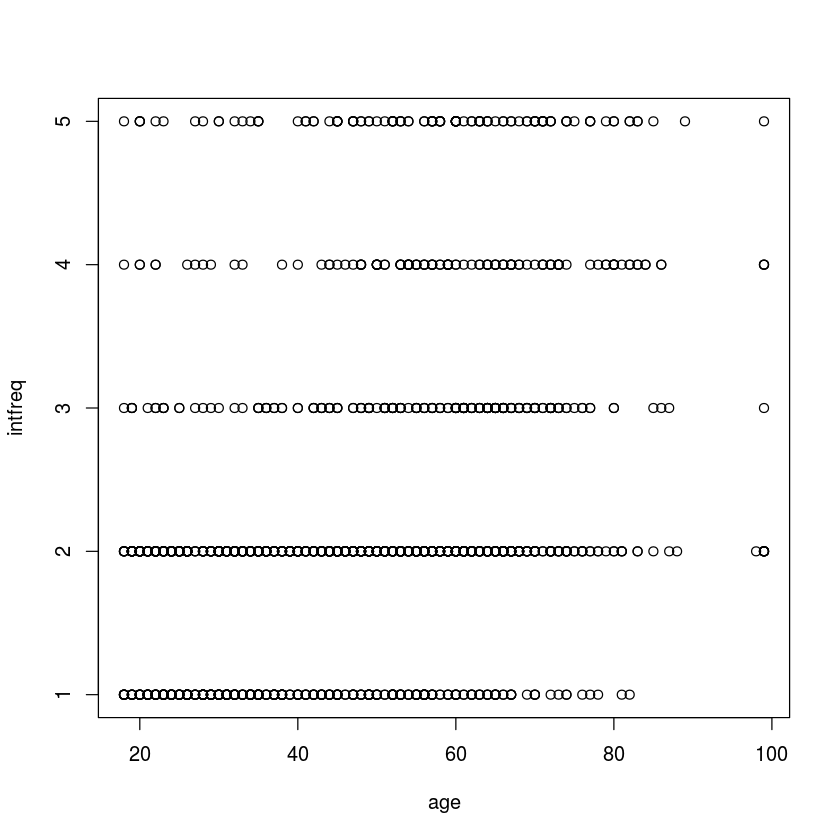

In [26]:
plot(internet_data[c("age", "intfreq")])

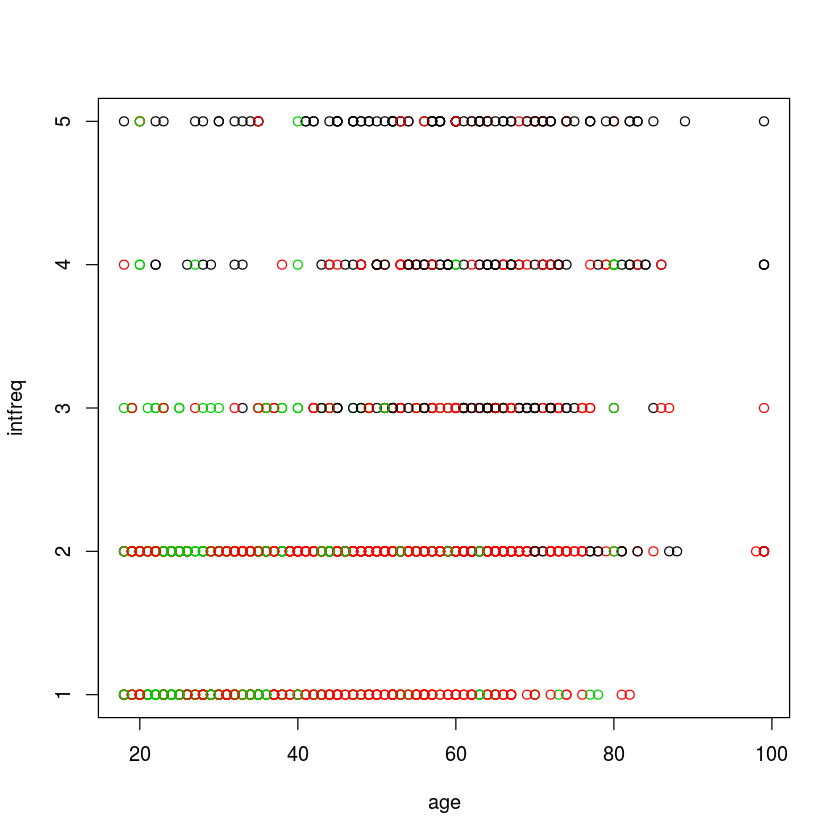

In [27]:
plot(internet_data[c("age", "intfreq")], col = result$cluster)

### Applying kMeans on the cleaned data for k = 5

In [28]:
result <- kmeans(internet_data.features, 5)

In [29]:
result$centers

,race,inc,eminuse,intfreq,age_cat
1,1.303030,1.867424,1.098485,2.984848,2.537879
2,1.203463,5.619048,1.051948,3.389610,3.770563
3,1.323438,7.540625,1.014063,1.781250,2.587500
4,5.386667,3.146667,1.080000,2.480000,2.253333
5,1.238095,4.015873,1.007937,1.738095,2.440476


#### Intepreting the results from Clustering

-- Cluster 1: People in this cluster mostly have income from 10 to under $20,000 and use internet about once a day.

-- Cluster 2: People in this cluster mostly belong to age category 60-80, income between $40,000 to $75,000 and use internet about once a day or several times a week.

-- Cluster 3: This cluster is dominated by people who earn from 75 to under $100,000

-- Cluster 4: This cluster has mostly has Native American/American Indian people

-- Cluster 5: People in this cluster earn 30 to under $40,000. This cluster represents people with maximum internet usage.

### Observing clustering for frequency of internet used parameter

#### On tabulating the intfreq against the clusters, its seen that cluster 2 has the maximum number of points for category 2 of intfreq. Thus people in cluster 2 use internet almost daily. 

In [14]:
table(internet_data$intfreq, result$cluster)

   
      1   2   3   4   5
  1  98 127  18  96   0
  2 181 305  28 207   0
  3  21  66  12  21  50
  4   0  36  10  12  58
  5   0  23   7   5  81

In [19]:
internet_data <- within(internet_data, age_cat <- factor(age_cat, 
                                                         labels = c("0", "20", "40", "60", "80", "100")))
internet_data <- within(internet_data, intfreq <- factor(intfreq, 
                                                         labels = c("Constantly", "Several Times a Day", 
                                                                    "Once a day", "Several Times a Week", 
                                                                    "Less Often")))

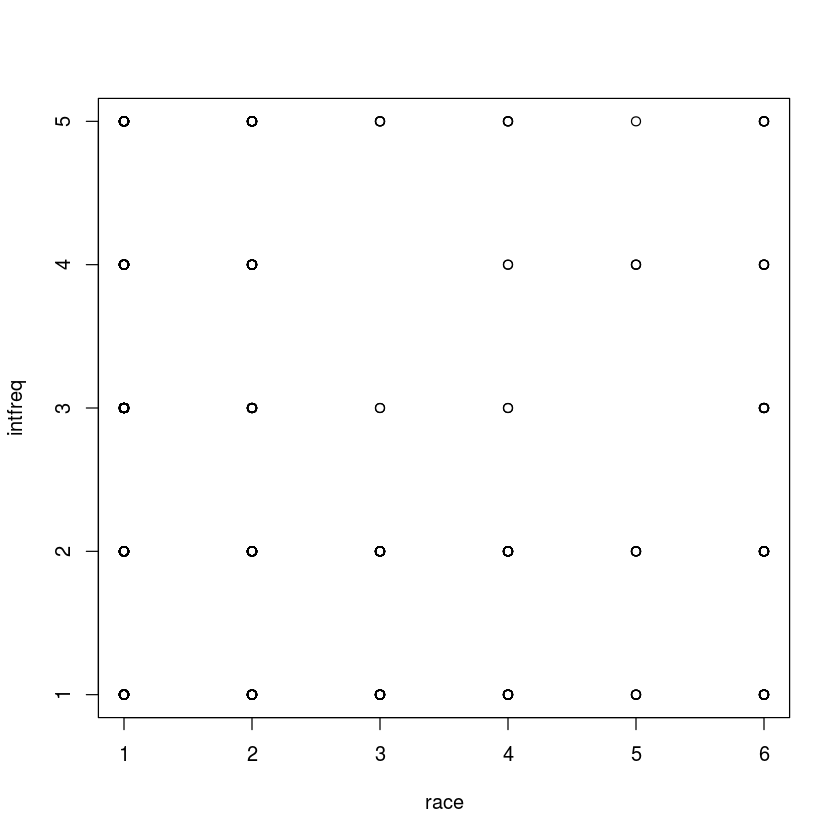

In [30]:
plot(internet_data[c("race", "intfreq")])

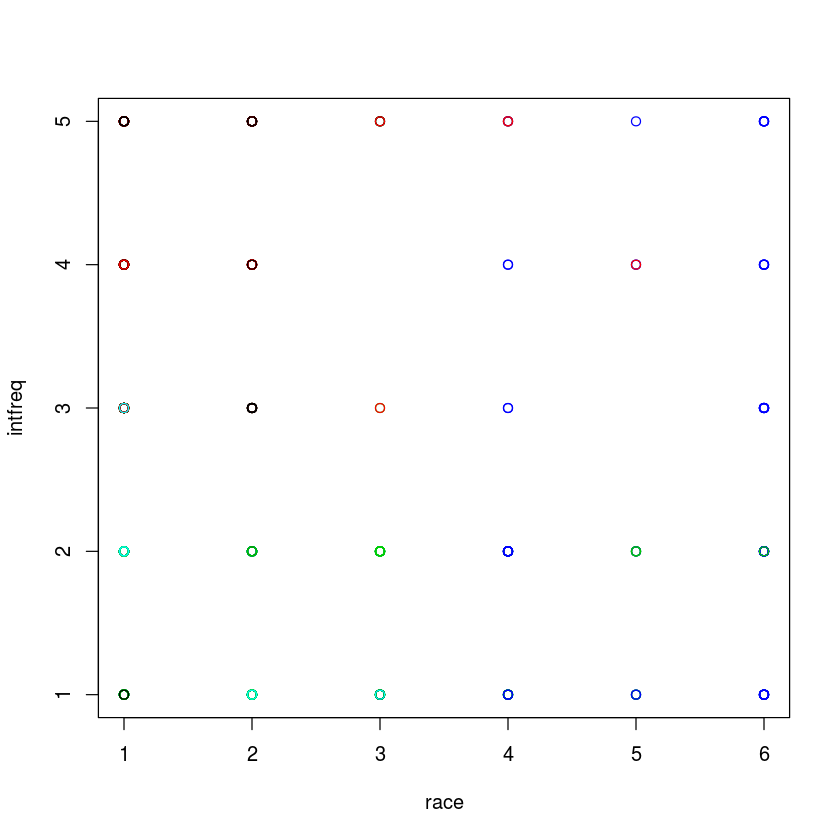

In [31]:
plot(internet_data[c("race", "intfreq")], col = result$cluster)

### References:

[1] http://www.learnbymarketing.com/tutorials/k-means-clustering-in-r-example/

[2] http://cowlet.org/2013/12/23/understanding-data-science-clustering-with-k-means-in-r.html

[3] https://rpubs.com/FelipeRego/K-Means-Clustering